In [1]:
# word cloud 패키지 설치

!pip install wordcloud

In [2]:
# 자연어 처리 패키지 설치
!pip install nltk

In [3]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import  word_tokenize
from nltk.corpus import  stopwords
from nltk.stem import  WordNetLemmatizer
from collections import  Counter
import matplotlib.pyplot as plt
from wordcloud import  STOPWORDS, WordCloud

#### NLTK 리소스를 
-#  다른 팝업 창 필요한 것들 다운로드

In [4]:
import nltk

In [5]:
#nltk.download()

In [6]:
# 파일 병합
all_files = glob.glob('./data/myCabinetExcelData*.xls')      # * : 모든 이런 이름의 파일 
all_files

['./data\\myCabinetExcelData (1).xls',
 './data\\myCabinetExcelData (2).xls',
 './data\\myCabinetExcelData (3).xls',
 './data\\myCabinetExcelData (4).xls',
 './data\\myCabinetExcelData.xls']

In [7]:
#!pip install xlrd

In [8]:
all_data = [] 
for file in all_files:
    df = pd.read_excel(file)
    all_data.append(df)

all_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Agricultural Disaster Risk Management and Capa...,"Wang, Caili; Gao, Yuwen; Aziz, Asad; Ogunmola,...",Mary Ann Leibert,2022
1,NaN,2,Big data ensemble clinical prediction for heal...,"Rallapalli, Sreekanth; Gondkar, R.R.",Inderscience,2018
2,NaN,3,Big Data and Predictive Analytics in Health Care,unknown,Mary Ann Leibert,2014
3,NaN,4,Big Data As an Enabler of Primary Education,unknown,Mary Ann Leibert,2016
4,NaN,5,Correction to: Big Data 2016;4:60–66,unknown,Mary Ann Leibert,2016
...,...,...,...,...,...,...
95,NaN,96,A reference architecture for big data solution...,"Geerdink, Bas",Inderscience,2015
96,NaN,97,Big Earth Data: a comprehensive analysis of vi...,"Merritt, Patrick; Bi, Haixia; Davis, Bradley; ...",John Wiley & Sons Ltd,2018
97,NaN,98,Big Earth data: A new frontier in Earth and in...,"Guo, Huadong",John Wiley & Sons Ltd,2017
98,NaN,99,GSio: A programmatic interface for delivering ...,"Larraondo, Pablo R.; Pringle, Sean; Guo, Jian;...",John Wiley & Sons Ltd,2017


In [9]:
all_data_concat = pd.concat(all_data, axis=0, ignore_index=True)
all_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Agricultural Disaster Risk Management and Capa...,"Wang, Caili; Gao, Yuwen; Aziz, Asad; Ogunmola,...",Mary Ann Leibert,2022
1,NaN,2,Big data ensemble clinical prediction for heal...,"Rallapalli, Sreekanth; Gondkar, R.R.",Inderscience,2018
2,NaN,3,Big Data and Predictive Analytics in Health Care,unknown,Mary Ann Leibert,2014
3,NaN,4,Big Data As an Enabler of Primary Education,unknown,Mary Ann Leibert,2016
4,NaN,5,Correction to: Big Data 2016;4:60–66,unknown,Mary Ann Leibert,2016
...,...,...,...,...,...,...
495,NaN,96,Artificial Bee Colony Reinforced Extended Kalm...,"Raghav, R. Srinivasa; Thirugnanasambandam, Kal...",Mary Ann Leibert,2022
496,NaN,97,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
497,NaN,98,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014
498,NaN,99,Curating Big Data Made Simple: Perspectives fr...,unknown,Mary Ann Leibert,2014


In [10]:
all_data_concat.to_csv('./data/riss_bidgata.csv', index = False, encoding= 'utf-8')

#### 데이터 전처리 

In [11]:
all_title = all_data_concat['제목']
all_title

0      Agricultural Disaster Risk Management and Capa...
1      Big data ensemble clinical prediction for heal...
2       Big Data and Predictive Analytics in Health Care
3            Big Data As an Enabler of Primary Education
4                   Correction to: Big Data 2016;4:60–66
                             ...                        
495    Artificial Bee Colony Reinforced Extended Kalm...
496                              Why Big Data = Big Deal
497                 Big Data 2.0: Cataclysm or Catalyst?
498    Curating Big Data Made Simple: Perspectives fr...
499                       The Uses of Big Data in Cities
Name: 제목, Length: 500, dtype: object

In [12]:
all_data_concat = all_data_concat.drop(all_data_concat.columns[[0]],
axis = 'columns')
all_data_concat

,번호,제목,저자,출판사,출판일
0,1,Agricultural Disaster Risk Management and Capa...,"Wang, Caili; Gao, Yuwen; Aziz, Asad; Ogunmola,...",Mary Ann Leibert,2022
1,2,Big data ensemble clinical prediction for heal...,"Rallapalli, Sreekanth; Gondkar, R.R.",Inderscience,2018
2,3,Big Data and Predictive Analytics in Health Care,unknown,Mary Ann Leibert,2014
3,4,Big Data As an Enabler of Primary Education,unknown,Mary Ann Leibert,2016
4,5,Correction to: Big Data 2016;4:60–66,unknown,Mary Ann Leibert,2016
...,...,...,...,...,...
495,96,Artificial Bee Colony Reinforced Extended Kalm...,"Raghav, R. Srinivasa; Thirugnanasambandam, Kal...",Mary Ann Leibert,2022
496,97,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
497,98,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014
498,99,Curating Big Data Made Simple: Perspectives fr...,unknown,Mary Ann Leibert,2014


In [13]:
stopWords = set(stopwords.words('english'))
stopWords   # 명사가 아닌 아래와 같은 단어들을 안쓰겠다  

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
lemma = WordNetLemmatizer()

In [15]:
words = []

for title in all_title:
    EnWords = re.sub(r'^[a-zA-Z]+', ' ', str(title))
    EnWordsToken = word_tokenize(EnWords.lower())     # 소문자로 바꿈
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]

    words.append(EnWordsTokenStopLemma)

In [16]:
# 불용어는 제거하고 단어형태를 일반화하기위해 표제어 추출 작업

In [17]:
# 2차원 리스트 --> 1차원 리스트로 변환한다.

words_reduce = list(reduce(lambda x, y: x+y, words ))
print(words_reduce)

['disaster', 'risk', 'management', 'capability', 'assessment', 'using', 'big', 'data', 'analytics', 'data', 'ensemble', 'clinical', 'prediction', 'healthcare', 'data', 'using', 'deep', 'learning', 'model', 'data', 'predictive', 'analytics', 'health', 'care', 'data', 'enabler', 'primary', 'education', ':', 'big', 'data', '2016', ';', '4:60–66', 'tensor', 'mining', 'big', 'data', 'practitioner', 'comparison', 'scalability', 'batch', 'big', 'data', 'processing', 'apache', 'spark', 'apache', 'flink', 'special', 'issue', 'paper', ':', 'deep', 'learning', 'assisted', 'big', 'data', 'analytics', 'biomedical', 'application', 'digital', 'healthcare', 'special', 'issue', 'paper', ':', 'big', 'data', 'business', 'data', 'analytics', ':', 'data', 'management', 'perspective', 'public', 'administration', 'reused-based', 'sharing', 'work', 'opportunity', 'big', 'data', 'multiquery', 'optimization', 'flink', 'big', 'data', 'understand', 'human', 'condition', ':', 'kavli', 'human', 'project', 'economis

In [18]:
count = Counter(words_reduce)  # count 라는 클래스 사용. 
count

Counter({'disaster': 6,
         'risk': 4,
         'management': 15,
         'capability': 4,
         'assessment': 4,
         'using': 25,
         'big': 302,
         'data': 379,
         'analytics': 81,
         'ensemble': 1,
         'clinical': 3,
         'prediction': 7,
         'healthcare': 8,
         'deep': 8,
         'learning': 21,
         'model': 26,
         'predictive': 4,
         'health': 12,
         'care': 5,
         'enabler': 1,
         'primary': 1,
         'education': 6,
         ':': 210,
         '2016': 2,
         ';': 2,
         '4:60–66': 1,
         'tensor': 2,
         'mining': 11,
         'practitioner': 1,
         'comparison': 2,
         'scalability': 1,
         'batch': 1,
         'processing': 18,
         'apache': 4,
         'spark': 5,
         'flink': 2,
         'special': 30,
         'issue': 36,
         'paper': 28,
         'assisted': 2,
         'biomedical': 3,
         'application': 22,
         'digita

In [19]:
word_count = dict()

for tag, counts in count.most_common(20):
    if len(str(tag)) > 1:
        word_count[tag] = counts
    # print(f'{tag} : {counts}')

word_count

{'data': 379,
 'big': 302,
 'analytics': 81,
 'big-data': 80,
 'analysis': 39,
 'issue': 36,
 'system': 35,
 '-data': 35,
 'approach': 32,
 'special': 30,
 'paper': 28,
 'model': 26,
 'using': 25,
 'framework': 25,
 'application': 22,
 'learning': 21,
 'earth': 21,
 'platform': 19}

#### 단어 개수 차트

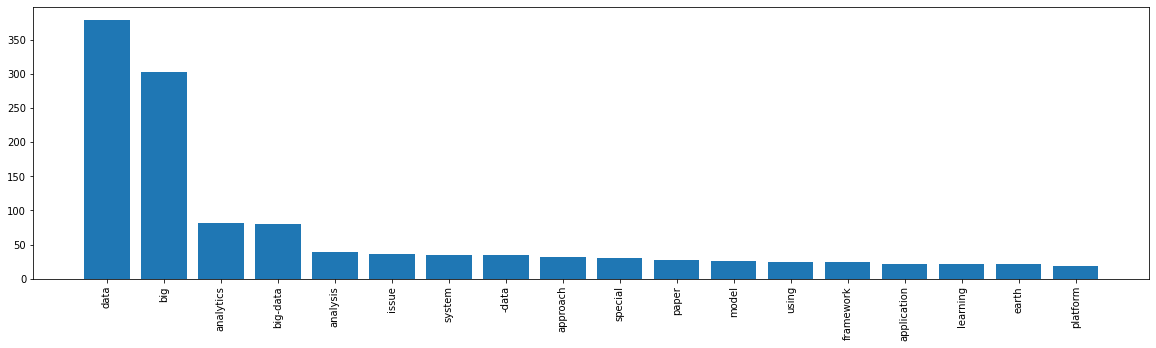

In [20]:
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.figure(figsize=(20, 5))
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=90)
plt.show()

#### 결과 시각화

In [21]:
# 연도별 학술문서 수를 추출하여 그래프를 그려보자
all_data_concat['doc_count'] = 0
summary_year = all_data_concat.groupby('출판일' , as_index=False)['doc_count'].count()
summary_year


,출판일,doc_count
0,1999,1
1,2004,1
2,2011,1
3,2012,8
4,2013,12
5,2014,44
6,2015,43
7,2016,73
8,2017,78
9,2018,67


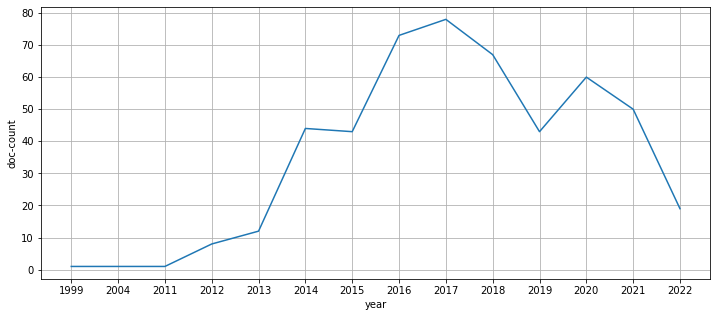

In [22]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)),summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

In [23]:

# 워드클라우드 그리기

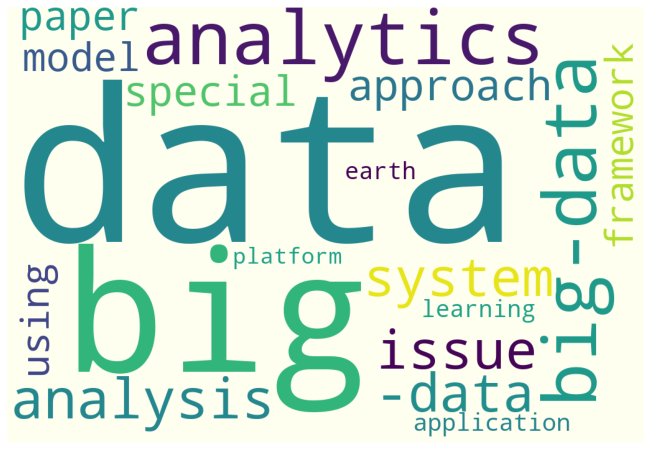

In [24]:
stopwords = set(STOPWORDS)
wc= WordCloud(background_color = 'ivory', stopwords = stopwords, width = 1024, height= 700) # Backgorund_color =  '#F5F5F5' 해도 괜찮아.
cloud =wc.generate_from_frequencies(word_count)         


plt.figure(figsize = (15,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [25]:
cloud.to_file('./data/riss_bigdata_wordcloud.png')